# Uvod u Pandas

Napomena: Ovi materijali su delimično bazirani na pandas tutorijalu Keith Galli-a ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks). Takođe, dataset koji ćemo koristiti - [Sales dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data) - je preuzet iz pomenutog tutorijala.

## Učitavanje potrebnih biblioteka

In [1]:
from pathlib import Path

import pandas as pd

## Učitavanje podataka i upoznavanje sa podacima o prodaji za jedan mesec

### Učitavanja podataka iz csv fajla

Podaci se nalaze u 'sales_data' direktorijumu, u okviru 'data' direktorijuma.
Prvo ćemo kreirati DATA_DIR konstantu koja će sadržati putanju do direktorijuma sa podacima

In [2]:
DATA_DIR = Path.cwd() / 'data/sales_data'
print(DATA_DIR)

/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data


Zatim ćemo učitati podatke iz 'Sales_January_2019' csv fajla:

In [3]:
jan_sales = pd.read_csv(DATA_DIR / 'Sales_January_2019.csv')

### Upoznavanje sa podacima

Prikazati prvih 10 redova učitanog dataset-a

In [4]:
jan_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


Utvrditi dimenzije data frame-a (broj redova i kolona)

In [5]:
jan_sales.shape

(9723, 6)

Ispisati listu naziva kolona data frame-a

In [6]:
jan_sales.columns.tolist()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

Utvrditi tip podatka svake kolone 

In [7]:
jan_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Lep pregled tipova podataka u pandas-u, uključujući i njihovo mapiranje na python tipove podataka, može se naći, na primer, ovde: [https://pbpython.com/pandas_dtypes.html](https://pbpython.com/pandas_dtypes.html).

Kompletan skup informacija o data frame-u:

In [8]:
jan_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


### Provera nedostajućih vrednosti

Prisustvo nedostajućih vrednosti u data frame-u može se ispitati primenom `isna()` metode:

In [9]:
jan_sales.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

#### Uklanjanje redova sa svim nedostajućim vrednostima

In [10]:
jan_sales.dropna(how="all", inplace=True)

In [11]:
jan_sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Selekcija pojedinačnih kolona i redova i kreiranje podskupa podataka

Selekcija kolona i redova, odnosno kreiranje podskupa podataka, se može uraditi na različite načine, ali je preporučena praksa da se koriste `loc` ili `iloc` metode pandas Dataframe-a i to na sledeći način:

- Kada se selekcija redova i kolona vrši izbor na osnovu njihovog rednog broja, trebalo bi koristiti `iloc`

- Kada se izbor zasniva na uslovu koje redovi treba da zadovolje i/ili kolone treba izabrati na osnovu njihovih naziva, treba koristiti `loc` 

**Primer 1**: selektovati prve 3 kolone i prvih 6 redova

In [12]:
jan_sales.iloc[:6, :3]

,Order ID,Product,Quantity Ordered
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,2
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1
5,141239,AAA Batteries (4-pack),1


**Primer 2**: selektovati poslednjih 5 redova i 1., 2., i 5. kolonu

In [13]:
jan_sales.iloc[-5:, [0,1,4]]

,Order ID,Product,Order Date
9718,150497,20in Monitor,01/26/19 19:09
9719,150498,27in FHD Monitor,01/10/19 22:58
9720,150499,ThinkPad Laptop,01/21/19 14:31
9721,150500,AAA Batteries (4-pack),01/15/19 14:21
9722,150501,Google Phone,01/13/19 16:43


**Primer 3**: Selektovati kolone `Order ID`, `Order Date`, i `Purchase Address` za porudžbine iz Bostona

Tip: string vrednostima kolone možemo pristupiti preko `str` polja, tako da onda možemo pozvati bilo koju string metodu nad vrednostima kolone

In [14]:
jan_sales.loc[jan_sales['Purchase Address'].str.contains('Boston'), ['Order ID', 'Order Date', 'Purchase Address']]

,Order ID,Order Date,Purchase Address
0,141234,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
17,141251,01/24/19 08:13,"414 Walnut St, Boston, MA 02215"
29,141263,01/11/19 23:33,"640 Spruce St, Boston, MA 02215"
31,141265,01/01/19 16:52,"853 Ridge St, Boston, MA 02215"
37,141271,01/30/19 10:51,"90 13th St, Boston, MA 02215"
...,...,...,...
9627,150409,01/10/19 02:38,"410 Forest St, Boston, MA 02215"
9660,150440,01/10/19 19:19,"82 Johnson St, Boston, MA 02215"
9666,150445,01/11/19 13:56,"147 Lincoln St, Boston, MA 02215"
9694,150473,01/10/19 09:09,"148 Hickory St, Boston, MA 02215"


**Primer 4**: Selektovati kolone `Order ID`, `Product`, i `Price Each` za porudžbine kod kojih naručena količina nije manja od 3

Napomena: Primetite da iako bi kolona `Quantity Ordered` trebalo da sadrži numeričke podatke, njene vrednosti su zapisane kao stringovi: 

In [15]:
jan_sales['Quantity Ordered'].tolist()[0]

'1'

Tako da je potrebno da prvo transformišemo `Quantity Ordered` kolonu u numerički tip:

In [16]:
jan_sales["Quantity Ordered"] = pd.to_numeric(jan_sales['Quantity Ordered'], errors="coerce")

In [17]:
jan_sales['Quantity Ordered'].tolist()[0]

1.0

Sada se možemo vratiti selekciji redova i kolona:

In [18]:
jan_sales.loc[jan_sales['Quantity Ordered'] >= 3, ['Order ID', 'Product', 'Price Each']]

,Order ID,Product,Price Each
12,141246,AAA Batteries (4-pack),2.99
52,141285,AAA Batteries (4-pack),2.99
58,141290,AA Batteries (4-pack),3.84
73,141305,AAA Batteries (4-pack),2.99
84,141316,AAA Batteries (4-pack),2.99
...,...,...,...
9513,150299,AA Batteries (4-pack),3.84
9590,150372,AAA Batteries (4-pack),2.99
9636,150417,Wired Headphones,11.99
9659,150439,Wired Headphones,11.99


## Učitavanje podataka o prodaji za sve mesece u 2019. god. i integracija mesečnih podataka o prodaji u jedan data frame

Potrebno je da učitamo podatke o prodaji iz svih csv fajlova u 'sales_data' direktorijumu (po jedan fajl za svaki mesec 2019. god.)

Prvo ćemo videti kako možemo da selektujemo samo .csv fajlove iz datog direktorijuma:

In [19]:
def get_csv_files(fpath: Path) -> list:
    if not fpath.is_dir():
        raise RuntimeError("The input argument is not a directory -> cannot proceed")
    csv_files = []
    for item in fpath.iterdir():
        if not item.is_dir() and item.suffix == '.csv':
            csv_files.append(item)
    return csv_files

In [20]:
get_csv_files(DATA_DIR)

[PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_December_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_April_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_February_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_March_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_August_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_May_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_November_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_October_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/DataspellProjects/2025v/pandas_labs/data/sales_data/Sales_

Sada ćemo, u petlji, uzimati jedan po jedan csv fajl, učitati podatke iz njega i dodati učitane podatke u jedan data frame koji sadrži podatke o prodaji za celu godinu. Za spajanje dva data frame-a, koristimo funkciju `pd.concat`:

In [21]:
all_sales = pd.DataFrame()
for csv_file in get_csv_files(DATA_DIR):
    temp_df = pd.read_csv(csv_file)
    all_sales = pd.concat([all_sales, temp_df])

In [22]:
all_sales.shape

(186850, 6)

### Pregled učitanih i integrisanih podataka o prodaji

In [23]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Obratite pažnju na razliku između broja redova i vrednosti indeksa. Deluje kao da se učitane vrednosti indeksa ponavljaju. Da posle ne bismo imali problema, potrebno je da sredimo, odnosno resetujemo indeks:

In [24]:
all_sales.reset_index(drop=True, inplace=True)

In [25]:
all_sales.index

RangeIndex(start=0, stop=186850, step=1)

Preimenovaćemo data frame, da smanjimo kucanje: 

In [26]:
sales = all_sales

Primetite da smo samo dali novo ime (referencu) postojećem objektu, odnosno, nismo kreirali novi data frame objekat, već samo novu referencu na postojeći

To možemo da potvrdimo:

In [27]:
id(sales) == id(all_sales)

True

In [28]:
sales is all_sales

True

Ako bismo hteli da kreiramo novi pd.DataFrame objekat, identičan postojećem, bilo bi potrebno da uradimo sledeće:

In [29]:
tmp = all_sales.copy()

In [30]:
tmp is all_sales

False

In [31]:
del tmp

## Sređivanje podataka (data wrangling) 

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Veliki broj kolona je tipa object, uključujući i one za koje to ne bismo očekivali - konkretno, kolone `Quantity Ordered`, `Price Each` i `Order Date`. To moramo promeniti, ali prvo ćemo se pozabaviti nedostajućim vrednostima.

### Uklanjanje observacija sa nedostajućim vrednostima

Izlaz f. `info()` sugeriše da nedostaju kompletni redovi podataka, odnosno da imamo observacije sa svim nedostajućim vrednostima. Uzećemo uzorak da to proverimo:

In [33]:
sales.loc[sales['Order ID'].isna(), ].sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11491,NaN,NaN,NaN,NaN,NaN,NaN
143055,NaN,NaN,NaN,NaN,NaN,NaN
156553,NaN,NaN,NaN,NaN,NaN,NaN
13238,NaN,NaN,NaN,NaN,NaN,NaN
105320,NaN,NaN,NaN,NaN,NaN,NaN
172028,NaN,NaN,NaN,NaN,NaN,NaN
175085,NaN,NaN,NaN,NaN,NaN,NaN
117578,NaN,NaN,NaN,NaN,NaN,NaN
69923,NaN,NaN,NaN,NaN,NaN,NaN
81626,NaN,NaN,NaN,NaN,NaN,NaN


Uklonićemo observacije (redove) sa svim nedostajućim vrednostima

In [34]:
sales.dropna(how="all", inplace=True)

In [35]:
sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Transformacija varijabli *Quantity Ordered* i *Price Each* u numeričke, a *Order Date* u datetime

Korisne smernice za ove oblike transformacije varijabli mogu se naći u odgovorima na [ovo pitanje na StackOverflow-u](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

Prvo ćemo pokušati da transformišemo `Quantity Ordered` u numeričku kolonu

In [36]:
try:
    sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
except ValueError as err:
    print(err)

Unable to parse string "Quantity Ordered" at position 254


Pogledaćemo red (observaciju) gde je došlo do greške:

In [37]:
sales.iloc[254, ]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 254, dtype: object

Red koji je uslovio grešku očigleno sadrži pogrešno unete podatke koji nam nisu potrebni. Tako da ćemo izvršiti konverziju u numerički tip i, pri tome, vrednosti koje ne mogu da se transformišu u numeričke zameniti sa NaN (tj. označiti podatke kao nedostajuće)

In [38]:
sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors="coerce")

Utvrdićemo broj i procenat uvedenih nedostajućih vrednosti u koloni `Quantity_Ordered`:

In [39]:
sales.Quantity_Ordered.isna().sum()

355

In [40]:
# sales.Quantity_Ordered.isna().sum() / sales.shape[0]
sales.Quantity_Ordered.isna().mean()

0.0019054775770913288

Na isti način ćemo transformisati `Price Each` kolonu:

In [41]:
sales['Price_Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [42]:
sales.Price_Each.isna().sum()

355

Izbacićemo redove gde su naručena količina ili jedinična cena nepoznati (NaN)

In [43]:
sales.dropna(how="any", inplace=True, subset=['Price_Each', 'Quantity_Ordered'])

In [44]:
sales.isna().sum().sum()

0

Proverićemo veličinu data frame-a nakon uklanjanja redova sa svim nedostajućim vrednostima:

In [45]:
sales.shape

(185950, 8)

Konačno, transformisaćemo `Order Date` u datetime tip

In [46]:
sales['Order Date'].sample(10)

51192     02/18/19 16:17
55624     03/12/19 13:03
36309     04/03/19 21:08
50498     02/12/19 19:20
176108    06/11/19 01:50
174693    06/25/19 11:09
114162    11/07/19 07:10
117512    10/06/19 16:36
177898    06/02/19 19:20
113619    11/14/19 15:19
Name: Order Date, dtype: object

In [47]:
sales['Order_Date'] = pd.to_datetime(sales['Order Date'], errors='coerce', format='%m/%d/%y %H:%M')

In [48]:
sales[['Order Date', 'Order_Date']].sample(10)

,Order Date,Order_Date
135349,10/27/19 11:32,2019-10-27 11:32:00
11963,12/27/19 19:33,2019-12-27 19:33:00
50519,02/02/19 20:37,2019-02-02 20:37:00
54795,02/03/19 19:00,2019-02-03 19:00:00
89815,05/14/19 14:40,2019-05-14 14:40:00
82191,08/17/19 09:12,2019-08-17 09:12:00
120666,10/19/19 14:48,2019-10-19 14:48:00
19600,12/10/19 20:07,2019-12-10 20:07:00
20066,12/30/19 20:29,2019-12-30 20:29:00
34158,04/28/19 10:11,2019-04-28 10:11:00


Nakon ovih transformacija, proverićemo kako sad izgledaju tipovi podataka u data frame-u:

In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Quantity_Ordered  185950 non-null  float64       
 7   Price_Each        185950 non-null  float64       
 8   Order_Date        185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 14.2+ MB


Uklonićemo kolone koje više nisu potrebne:

In [50]:
sales.drop(columns=['Quantity Ordered', 'Price Each', 'Order Date'], inplace=True)

In [51]:
sales.columns.tolist()

['Order ID',
 'Product',
 'Purchase Address',
 'Quantity_Ordered',
 'Price_Each',
 'Order_Date']

### Dodavanje *Purchase_City* kolone

Sad ćemo videti kako možemo da napravimo novu kolonu od postojeće.

Pošto će nam kasnije biti potrebno da uporedimo prodaju po gradovima, dodaćemo kolonu sa nazivom grada u kome je porudžbina napravljena. Nakon imena grada treba da stoji oznaka države, data u zagradi (npr. „Atlanta (GA)“), da bi se omogućilo razlikovanje gradova sa istim nazivima.   

Uzećemo uzorak vrednosti kolone `Purchase Address` kako bismo se upoznali sa formatom u kome su adrese zapisane:

In [52]:
sales['Purchase Address'].sample(10)

153900          91 Chestnut St, Portland, OR 97035
114905       101 Lincoln St, Los Angeles, CA 90001
140403            547 Center St, Atlanta, GA 30301
43291             679 North St, Portland, OR 97035
97325     199 Lakeview St, San Francisco, CA 94016
183494         618 2nd St, San Francisco, CA 94016
123744            416 Johnson St, Dallas, TX 75001
68823       429 Cherry St, San Francisco, CA 94016
91812     702 Lakeview St, San Francisco, CA 94016
174480           541 Chestnut St, Boston, MA 02215
Name: Purchase Address, dtype: object

Prvo ćemo kreirati funkciju koja izdvaja grad (i oznaku države) iz kolone `Purchase Address`: 

In [53]:
def get_city_state(address: str) -> str:
    _, city, state_zip = address.split(',')
    state, _ = state_zip.split()
    return f"{city.strip()} ({state})"

In [54]:
get_city_state(sales['Purchase Address'][0])

'New York City (NY)'

Zatim ćemo koristeći `apply` metodu, primeniti `get_city_and_state()` f. na svaku vrednost serije `Purchase Address`. Ali, prvo ćemo isprobati na uzorku adresa:

In [55]:
sales['Purchase Address'].sample(10).apply(get_city_state)

73014     San Francisco (CA)
46028            Boston (MA)
105012           Austin (TX)
141528          Seattle (WA)
3369             Dallas (TX)
47006       Los Angeles (CA)
15901            Dallas (TX)
24532          Portland (OR)
17196     San Francisco (CA)
180663    San Francisco (CA)
Name: Purchase Address, dtype: object

Sad možemo primenti funkciju na sve vrednosti kolone `Purchase Address`, kako bi kreirali novu kolonu - `Purchase_City`

In [56]:
sales['Purchase_City'] = sales['Purchase Address'].apply(get_city_state)

In [57]:
sales[['Purchase Address', 'Purchase_City']].sample(20)

,Purchase Address,Purchase_City
114367,"671 Lake St, New York City, NY 10001",New York City (NY)
61140,"598 Jackson St, New York City, NY 10001",New York City (NY)
19474,"826 5th St, Austin, TX 73301",Austin (TX)
117377,"858 Hickory St, San Francisco, CA 94016",San Francisco (CA)
101272,"211 Wilson St, Boston, MA 02215",Boston (MA)
123600,"198 Forest St, Austin, TX 73301",Austin (TX)
20479,"275 Elm St, Boston, MA 02215",Boston (MA)
90254,"385 9th St, Seattle, WA 98101",Seattle (WA)
176870,"506 Highland St, New York City, NY 10001",New York City (NY)
121712,"661 Washington St, New York City, NY 10001",New York City (NY)


Sačuvaćemo transformisani dataset u fajl:

In [58]:
processed_data_dir = DATA_DIR / 'processed_data'
processed_data_dir.mkdir(parents=True, exist_ok=True)

In [59]:
sales.to_csv(processed_data_dir / 'sales_2019.csv', index=False)

## Eksploratorna analiza podataka

Sada ćemo pokušati da odgovorimo na neka pitanja vezana za ostvarenu prodaju u 2019. godini, kroz eksploratornu analizu `sales` dataseta

In [60]:
from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd

In [61]:
sales = pd.read_csv(Path.cwd() / 'data' / 'sales_data' / 'processed_data' / 'sales_2019.csv', parse_dates=['Order_Date'])

In [62]:
sales.head(10)

,Order ID,Product,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,Purchase_City
0,295665,Macbook Pro Laptop,"136 Church St, New York City, NY 10001",1.0,1700.00,2019-12-30 00:01:00,New York City (NY)
1,295666,LG Washing Machine,"562 2nd St, New York City, NY 10001",1.0,600.00,2019-12-29 07:03:00,New York City (NY)
2,295667,USB-C Charging Cable,"277 Main St, New York City, NY 10001",1.0,11.95,2019-12-12 18:21:00,New York City (NY)
3,295668,27in FHD Monitor,"410 6th St, San Francisco, CA 94016",1.0,149.99,2019-12-22 15:13:00,San Francisco (CA)
4,295669,USB-C Charging Cable,"43 Hill St, Atlanta, GA 30301",1.0,11.95,2019-12-18 12:38:00,Atlanta (GA)
5,295670,AA Batteries (4-pack),"200 Jefferson St, New York City, NY 10001",1.0,3.84,2019-12-31 22:58:00,New York City (NY)
6,295671,USB-C Charging Cable,"928 12th St, Portland, OR 97035",1.0,11.95,2019-12-16 15:10:00,Portland (OR)
7,295672,USB-C Charging Cable,"813 Hickory St, Dallas, TX 75001",2.0,11.95,2019-12-13 09:29:00,Dallas (TX)
8,295673,Bose SoundSport Headphones,"718 Wilson St, Dallas, TX 75001",1.0,99.99,2019-12-15 23:26:00,Dallas (TX)
9,295674,AAA Batteries (4-pack),"77 7th St, Dallas, TX 75001",4.0,2.99,2019-12-28 11:51:00,Dallas (TX)


In [63]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Purchase Address  185950 non-null  object        
 3   Quantity_Ordered  185950 non-null  float64       
 4   Price_Each        185950 non-null  float64       
 5   Order_Date        185950 non-null  datetime64[ns]
 6   Purchase_City     185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.9+ MB


### Zadatak 1. Koji je bio najbolji mesec za prodaju? Kolika zarada je ostvarena tog meseca?

Da bismo odgovorili na ovo pitanje, potrebno je da:
- izračunamo ukupan prihod po porudžbini
- izdvojimo mesec iz datuma porudžbine, tako da možemo grupisati porudžbine na mesečnoj osnovi
- izračunamo ukupan prihod na mesečnom nivou

**Korak 1**: Izračunavanje ukupnog prihoda po porudžbini

In [64]:
sales['Total_Revenue'] = sales.Quantity_Ordered * sales.Price_Each

In [65]:
sales[['Total_Revenue', 'Quantity_Ordered', 'Price_Each']].sample(10)

,Total_Revenue,Quantity_Ordered,Price_Each
42498,11.95,1.0,11.95
112195,2.99,1.0,2.99
48558,11.99,1.0,11.99
172009,149.99,1.0,149.99
66143,99.99,1.0,99.99
109504,11.99,1.0,11.99
5771,109.99,1.0,109.99
34544,3.84,1.0,3.84
73632,99.99,1.0,99.99
88127,3.84,1.0,3.84


**Korak 2**: Izdvajanje meseca iz datuma porudžbine (`Order_Date`)

S obzirom da je `Order_Date` pandas serija tipa datetime, možemo koristiti `dt` da bismo dobili pristup svakoj vrednosti u seriji kao datetime objektu. 

Kad imamo pristup datumu porudžbine kao datetime objektu, možemo uzeti bilo koji element datuma (godina, mesec, dan, itd.) i vremena porudžbine kroz odgovarajuća polja objekta.

In [66]:
sales['Order_Month'] = sales.Order_Date.dt.month

In [67]:
sales[['Order_Date', 'Order_Month']].sample(10)

,Order_Date,Order_Month
156541,2019-09-15 10:08:00,9
76518,2019-08-20 11:58:00,8
33485,2019-04-20 20:35:00,4
72758,2019-08-05 14:16:00,8
138007,2019-01-27 09:27:00,1
48973,2019-02-23 07:18:00,2
76871,2019-08-26 22:14:00,8
3215,2019-12-27 08:58:00,12
71495,2019-08-23 13:42:00,8
80363,2019-08-14 00:06:00,8


**Korak 3**: Izračunavanje ukupnog prihoda za svaki mesec

In [68]:
revenue_per_month = sales.groupby('Order_Month').Total_Revenue.sum()
revenue_per_month

Order_Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_Revenue, dtype: float64

Sortiranje rezultata u opdajućem redosledu ukupnog mesečnog prihoda

In [69]:
revenue_per_month.sort_values(ascending=False)

Order_Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total_Revenue, dtype: float64

Možemo predstaviti i sagledati mesečne prihode na (bar) plotu, pošto vizuelno predstavljanje podataka često olakšava razumevanje trendova koji mogu biti prisutni u podacima.

Za kreiranje plota, koristićemo Matplotlib bibliotetku, čiju dokumentaciju možete naći [ovde](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), dok [ovaj primer](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py) može poslužiti kao dobra polazna osnova za konkretni zadatak vizuelizacije koji imamo.

Napomena: Na [ovom GitHub repozitorijumu](https://github.com/matplotlib/cheatsheets) možete naći dobro urađene cheat sheets i savete za korišćenje Mathplotlib bliblioteke.

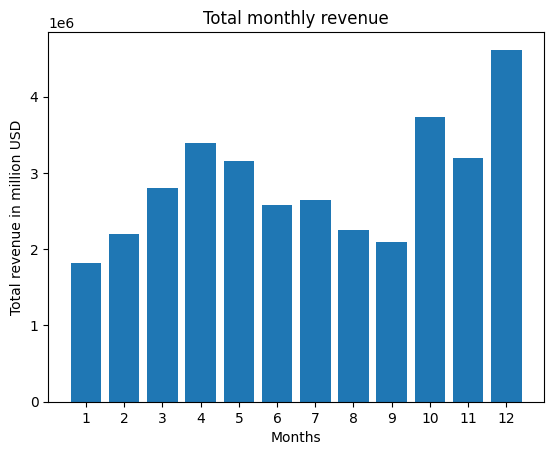

In [70]:
x = revenue_per_month.index.tolist()
y = revenue_per_month.values.tolist()

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('Months')
ax.set_ylabel('Total revenue in million USD')
ax.set_title('Total monthly revenue')
ax.set_xticks(range(1,13))

plt.show()

### Zadatak 2. Iz kog grada je naručeno najviše proizvoda?

Za potrebe ovog zadatka, grupisaćemo porudžbine prema gradu iz koga dolaze i sumirati broj porudžbina iz svakog grada:

In [71]:
sales.head(10)

,Order ID,Product,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,Purchase_City,Total_Revenue,Order_Month
0,295665,Macbook Pro Laptop,"136 Church St, New York City, NY 10001",1.0,1700.00,2019-12-30 00:01:00,New York City (NY),1700.00,12
1,295666,LG Washing Machine,"562 2nd St, New York City, NY 10001",1.0,600.00,2019-12-29 07:03:00,New York City (NY),600.00,12
2,295667,USB-C Charging Cable,"277 Main St, New York City, NY 10001",1.0,11.95,2019-12-12 18:21:00,New York City (NY),11.95,12
3,295668,27in FHD Monitor,"410 6th St, San Francisco, CA 94016",1.0,149.99,2019-12-22 15:13:00,San Francisco (CA),149.99,12
4,295669,USB-C Charging Cable,"43 Hill St, Atlanta, GA 30301",1.0,11.95,2019-12-18 12:38:00,Atlanta (GA),11.95,12
5,295670,AA Batteries (4-pack),"200 Jefferson St, New York City, NY 10001",1.0,3.84,2019-12-31 22:58:00,New York City (NY),3.84,12
6,295671,USB-C Charging Cable,"928 12th St, Portland, OR 97035",1.0,11.95,2019-12-16 15:10:00,Portland (OR),11.95,12
7,295672,USB-C Charging Cable,"813 Hickory St, Dallas, TX 75001",2.0,11.95,2019-12-13 09:29:00,Dallas (TX),23.90,12
8,295673,Bose SoundSport Headphones,"718 Wilson St, Dallas, TX 75001",1.0,99.99,2019-12-15 23:26:00,Dallas (TX),99.99,12
9,295674,AAA Batteries (4-pack),"77 7th St, Dallas, TX 75001",4.0,2.99,2019-12-28 11:51:00,Dallas (TX),11.96,12


In [72]:
sales_per_city = sales.groupby('Purchase_City').Quantity_Ordered.sum()
sales_per_city

Purchase_City
Atlanta (GA)          16602.0
Austin (TX)           11153.0
Boston (MA)           22528.0
Dallas (TX)           16730.0
Los Angeles (CA)      33289.0
New York City (NY)    27932.0
Portland (ME)          2750.0
Portland (OR)         11303.0
San Francisco (CA)    50239.0
Seattle (WA)          16553.0
Name: Quantity_Ordered, dtype: float64

Zatim ćemo odrediti maksimalnu (ukupnu) naručenu količinu, kao i grad na koji se taj maksimum odnosi:

In [73]:
# max. vrednost
sales_per_city.max()

50239.0

In [74]:
# indeks kome odgovara max vrednost
sales_per_city.idxmax()

'San Francisco (CA)'

Na kraju, prikazaćemo rezultate vizuelno primenom bar plota.

Napomena: za fina podešavanja prikaza plota, brojne korisne metode se mogu naći u [ovom delu](https://matplotlib.org/stable/api/axes_api.html) Matplotlib dokumentacije

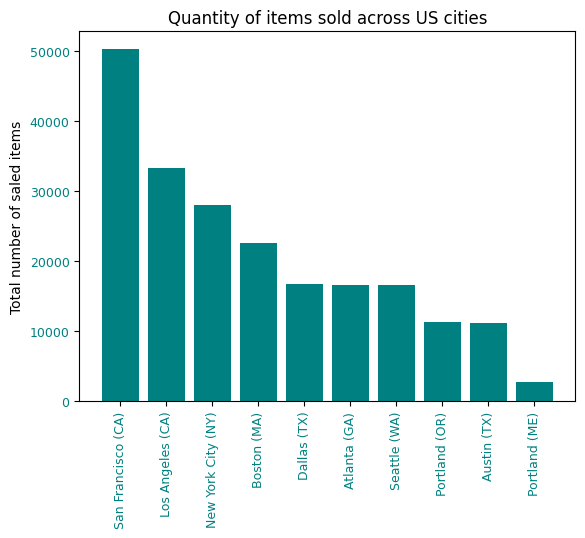

In [75]:
sales_per_city.sort_values(ascending=False, inplace=True)

x = sales_per_city.index.tolist()
y = sales_per_city.values.tolist()

fig, ax = plt.subplots()
ax.bar(x, y, color='teal')
ax.tick_params(axis='x', labelrotation=90, labelsize=9, labelcolor='teal')
ax.tick_params(axis='y', labelcolor='teal', labelsize=9)
ax.set_ylabel('Total number of saled items')
ax.set_title('Quantity of items sold across US cities')

plt.show()

#### Zadatak Viz 1: Treemap plot

Prikazati ukupne naručene količine na nivou pojedinačnih gradova i država primenom tzv. [*treeemap* plota](https://python-graph-gallery.com/treemap/) koji se može jednostavno kreirati primenom **[squarify](https://python-graph-gallery.com/590-advanced-treemap/)** biblioteke.
Predstaviti istom bojom gradove koji pripadaju istoj državi (tj., polja treemap plota koja se odnose na gradove iz iste države bi trebalo da budu iste boje).

Za rad sa paletama boja, koristićemo **[pypalettes](https://github.com/JosephBARBIERDARNAL/pypalettes)** biblioteku koja sadrži kolekciju od preko 2500 paleta boja i omogućuje jednostavno pretraživanje i korišćenje tih paleta. Sve potrebno za osnovno korišćenje ove biblioteke je lepo predstavljeno ovde: [https://python-graph-gallery.com/color-palette-finder/](https://python-graph-gallery.com/color-palette-finder/)

### Zadatak 3. Kada, tokom dana, klijenti imaju tendenciju da naprave najvrednije porudžbine?

Da bismo odgovorili na ovo pitanje, potrebno je da izdvojimo sate iz `Order_Date` kolone i utvrdimo prosečnu ukupnu cenu porudžbine za svaki sat u toku dana

In [76]:
sales.head(10)

,Order ID,Product,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,Purchase_City,Total_Revenue,Order_Month
0,295665,Macbook Pro Laptop,"136 Church St, New York City, NY 10001",1.0,1700.00,2019-12-30 00:01:00,New York City (NY),1700.00,12
1,295666,LG Washing Machine,"562 2nd St, New York City, NY 10001",1.0,600.00,2019-12-29 07:03:00,New York City (NY),600.00,12
2,295667,USB-C Charging Cable,"277 Main St, New York City, NY 10001",1.0,11.95,2019-12-12 18:21:00,New York City (NY),11.95,12
3,295668,27in FHD Monitor,"410 6th St, San Francisco, CA 94016",1.0,149.99,2019-12-22 15:13:00,San Francisco (CA),149.99,12
4,295669,USB-C Charging Cable,"43 Hill St, Atlanta, GA 30301",1.0,11.95,2019-12-18 12:38:00,Atlanta (GA),11.95,12
5,295670,AA Batteries (4-pack),"200 Jefferson St, New York City, NY 10001",1.0,3.84,2019-12-31 22:58:00,New York City (NY),3.84,12
6,295671,USB-C Charging Cable,"928 12th St, Portland, OR 97035",1.0,11.95,2019-12-16 15:10:00,Portland (OR),11.95,12
7,295672,USB-C Charging Cable,"813 Hickory St, Dallas, TX 75001",2.0,11.95,2019-12-13 09:29:00,Dallas (TX),23.90,12
8,295673,Bose SoundSport Headphones,"718 Wilson St, Dallas, TX 75001",1.0,99.99,2019-12-15 23:26:00,Dallas (TX),99.99,12
9,295674,AAA Batteries (4-pack),"77 7th St, Dallas, TX 75001",4.0,2.99,2019-12-28 11:51:00,Dallas (TX),11.96,12


**Korak 1**: Kreiranje 'Order_Hour' kolone

In [77]:
sales['Order_Hour'] = sales.Order_Date.dt.hour

In [78]:
sales[['Order_Date', 'Order_Hour']].sample(10)

,Order_Date,Order_Hour
100564,2019-11-28 18:00:00,18
97461,2019-05-25 22:20:00,22
50735,2019-02-18 14:48:00,14
153591,2019-09-20 09:35:00,9
70393,2019-03-23 18:43:00,18
40669,2019-04-18 11:39:00,11
168811,2019-07-25 09:20:00,9
168054,2019-07-23 12:50:00,12
55061,2019-02-20 16:24:00,16
112597,2019-11-19 16:12:00,16


**Korak 2**: Grupisanje narudžbina na osnovu `Order_Hour` i izračuvanje prosečne vrednosti `Total_Price` varijable za svaku grupu

In [79]:
sales['Order_Revenue'] = sales.Quantity_Ordered * sales.Price_Each

In [80]:
sales_per_hour = sales.groupby('Order_Hour').Order_Revenue.mean()
sales_per_hour

Order_Hour
0     182.537409
1     196.113566
2     188.939212
3     175.400590
4     190.469567
5     174.625148
6     180.545125
7     185.702847
8     190.592866
9     187.360606
10    177.657782
11    185.368644
12    184.064617
13    177.705483
14    189.700722
15    190.815686
16    183.416921
17    195.372200
18    180.728689
19    186.977028
20    186.597664
21    186.979293
22    182.220495
23    187.936963
Name: Order_Revenue, dtype: float64

Odredićemo najveću prosečnu vrednost prodaje i sat u toku dana na koji se ona odnosi:

In [81]:
max_hourly_sales = sales_per_hour.max()
max_hourly_sales_index = sales_per_hour.idxmax()
print(f"Maximum average revenue of {max_hourly_sales:.3f} was realised between {max_hourly_sales_index}h and " + \
      f"{max_hourly_sales_index + 1}h")

Maximum average revenue of 196.114 was realised between 1h and 2h


Prikaz rezultata u formi linijskog plota

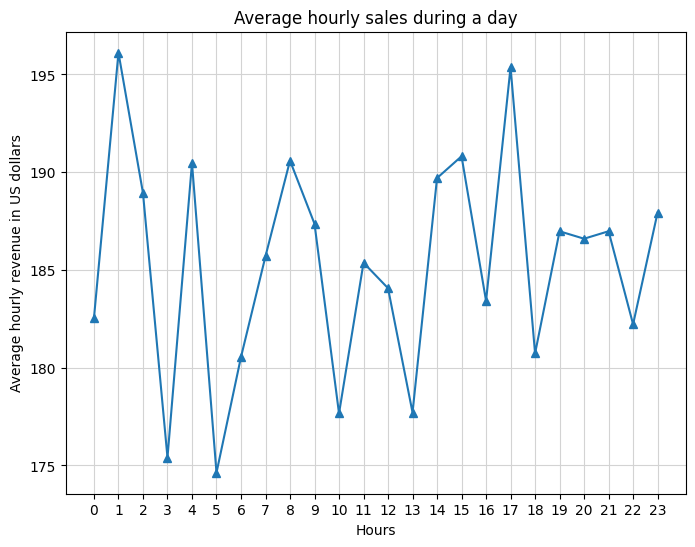

In [82]:
x = sales_per_hour.index.tolist()
y = sales_per_hour.values.tolist()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, marker='^')
ax.set_xticks(range(0,24))
ax.set_xlabel("Hours")
ax.set_ylabel("Average hourly revenue in US dollars")
ax.grid(visible=True, which='major', axis='both', color='lightgray')
ax.set_title("Average hourly sales during a day")

plt.show()

### Zadatak 4. Odrediti top 5 proizvoda po obimu prodaje, kao i top 5 po ostvarenom prihodu tokom 2019. god.

Prvo ćemo utvrditi koliko različitih proizvoda postoji i koliko često su bili naručeni

Gornja pandas serija nam daje broj porudžbina u kojima se pojavio proizvod, ali ne govori nam o količinama koje su naručene.

Potrebno je da za svaki proizvod, uzmemo ukupnu naručenu količinu i ukupnu cenu za sve porudžbine koje se odnose na taj proizvod:

Odredićemo top 5 proizvoda po ostvarenom obimu prodaje:

Takođe, top 5 proizvoda po ostvarenom prihodu:

Predstavićemo ove rezultate i vizuelno. Konkretno, napravićemo dve *horizontalna* bar plota, jedan pored drugog, pri čemu će prvi prikazivati ukupan prihod po proizvodu, a drugi prodatu količinu proizvoda. Sortiraćemo plotove na osnovu ukupnog prihoda, tako da proizvodi sa najvećim prihodom budu prikazani pri vrhu plota.

Smernice za kreiranje horizontalnog bar plota možete naći, na primer, u [ovom primeru](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html) iz Mathplotlib dokumentacije.

#### Zadatak Viz_2: Linijski plot sa dve skale

Izračunate vrednosti za ukupnu prodaju i ukupnu ostvarenu zaradu po proizvodu možemo predstaviti i na jednom plotu, koristeći različite skale za vrednosti predstavljene na y-osi. Na primer, skala na levoj strani plota da predstavlja ostvareni prihod po proizvodu, a skala na desnoj strani da prikazuje ukupan ostvaren obim prodaje po proizvodu.  

[Ovaj primer](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py) iz matplotlib dokumentacije pokazuje kako izgleda i kako se može kreirati linijski plot sa dve različite skale na y-osi. 

Po uzoru na dati primer, potrebno je kreirati plot za tekući zadatak, odnosno prikaz izračunatih vrednosti za ukupnu prodaju i ukupnu ostvarenu zaradu po proizvodu 

### Zadatak 5. Pregled ostvarenog prihoda od prodaje po proizvodima i gradovima

Podatke možemo grupisati na osnovu više od jednog atributa (kolone). U ovom slučaju, izvršićemo grupisanje na osnovu proizvoda i grada iz koga je porudžbina stigla, i izračunati ukupan prihod za svaki proizvod u svakom gradu:

Primetite da smo kao rezultat dobili pandas seriju sa dva indeksa - `Product` i `Purchase_City`:

Ovakvu seriju možemo transformisati u data frame uz pomoć `unstack()` metode:

S obzirom da je ovakav prikaz ostvarene prodaje vrlo nepregledan, predstavićemo ga vizuelno, koristeći `heatmap`. 

Korisne smernice za kreiranje heatmap-e date su, na primer, [ovde](https://python-charts.com/correlation/heatmap-matplotlib/).

Na [ovoj stranici](https://matplotlib.org/stable/users/explain/colors/colormaps.html) Matplotlib dokumentacije možete naći pregled predefinisanih kolor mapa.

#### Zadatak Viz_3: Heatmap sa dodatim numeričkim vrednostima

Unaprediti prethodni heatmap plot, time što ćete u svakoj ćeliji heatmap-e prikazati ukupan ostvareni prihod od prodaje za svaku kombinaciju grad - proizvod, izražen u milionima USA dolara  

Dodatne smernice za kreiranje heatmap-e, uključujući neke složenije primere, date su na [ovoj stranici](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) matplotlib dokumentacije.

#### Zadatak Viz_4: Prikazati uporedo mesečni obim narudžbina u 2109. godini za svaku državu ponaosob

Prikaz bi trebalo da bude u obliku mreže (grid) bar plotova (po jedan za svaku državu), predstavljene u dva reda i četiri kolone.
Bar plotovi bi trebalo da budu sortrani u rastućem redosledu obima prodaje, tako da prvi odgovara državi sa najmanjim ukupnim obimom prodaje, dok poslednji odgovara državi sa najvećim ukupnim obimom prodaje.

Potrebno je prvo kreirati novu kolonu koja predstavlja državu iz koje je porudžbina stigla

Zatim je potrebno odrediti ukupan obim narudžbina za svaku državu u 2019. god., kako bi to iskoristili kasnije za sortiranje bar plotova u okviru mreže (grid): 

Sledeći korak je da se za svaku državu ponaosob izračuna obim prodaje na mesečnom nivou:

Konačno, prikazati mesečne kupovine za svaku državu u formi mreže bar plotova:

### Zadaci za vežbu

1. Uradite pregled ukupnog ostvarenog prihoda po proizvodima i državama.

2. Kojih dana, tokom nedelje, je prosečna vrednost porudžbina bila najviša?
